# PCA on a nonlinear problem

We apply PCA on a toy dataset consisting in numerous rotations of a base image with different angles.

The original image is a gray level image representing figure 3. We use an algorithm to rotate the image with $n$ rotations with angles between 0 and 360 degrees. Each image is of size $61\times 61$, and the data then live in  $\mathbb{R}^{3721}$


In [50]:
import scipy.io as sio
import scipy as sp
import skimage 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

#colab path

# from google.colab import drive
# drive.mount("/content/gdrive/")

# !ls "/content/gdrive/My Drive/DS1/Classes inversées/Classe inversée 2: Séparation de processus géophysiques/Données/"

# path = "/content/gdrive/My Drive/DS1/Classes inversées/Classe inversée 2: Séparation de processus géophysiques/Données/image3.mat"

# local path

path = "/home/administrateur/Documents/cours/isblue/classes_inversées/PCA_EOF/lab/image3.mat"

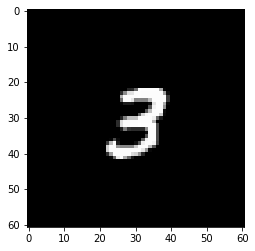

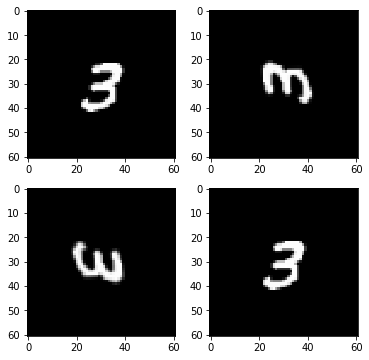

In [51]:
data = sio.loadmat(path)

im = data['image3']

m,n = im.shape

plt.figure
plt.imshow(im, cmap ='gray')

nb_images = 100;

theta = np.linspace(0,360,nb_images)

images = np.zeros((m,n,nb_images))

for i in range(nb_images):
    images[:,:,i] = skimage.transform.rotate(im,theta[i])

rcParams['figure.figsize'] = (6., 6.0)
plt.figure()
plt.subplot(221)
plt.imshow(images[:,:,0], cmap ='gray')
plt.subplot(222)
plt.imshow(images[:,:,25], cmap ='gray')
plt.subplot(223)
plt.imshow(images[:,:,75], cmap ='gray')
plt.subplot(224)
plt.imshow(images[:,:,99], cmap ='gray')
plt.savefig("rotated_3s.png")

1) Visualize and interpret the covariance matrix of this dataset by treating each pixel as a feature and the different rotations as the different samples.

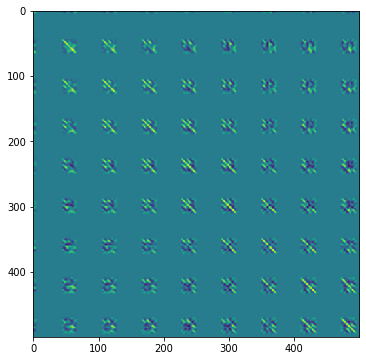

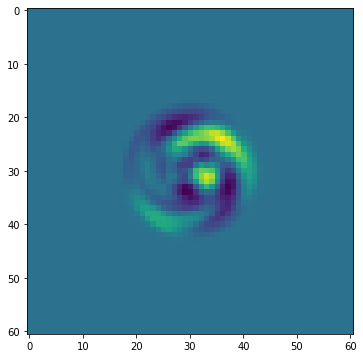

In [46]:
from sklearn.decomposition import PCA

# reshape data
im = np.reshape(images,(m*n,nb_images)).T


# visualize covariance matrix

cov = np.cov(im.T)

plt.figure()
plt.imshow(cov[1500:2000,1500:2000])
plt.show()

n_components = 8

pixel = 1500
cov_im_pixel = np.reshape(cov[pixel,:],(m,n))
                          
plt.figure()
plt.imshow(cov_im_pixel)
plt.show()

2) Apply PCA to this datasets using the scikit-learn package

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

First visualize the eigenvalues of the covariance matrix, then the total explained variance as a function of the number $n$ of retained components
Then display the 16 first principal components as images and the associated decomposition coefficients for a random image


3)Add noise to the data with a SNR=10dB for instance and recompute the decomposition. Look in particular at the last components


(8, 3721)
(8, 61, 61)
(100, 8)


IndexError: index 8 is out of bounds for axis 0 with size 8

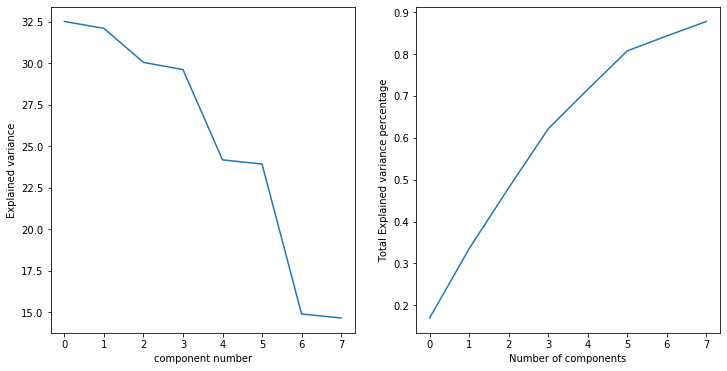

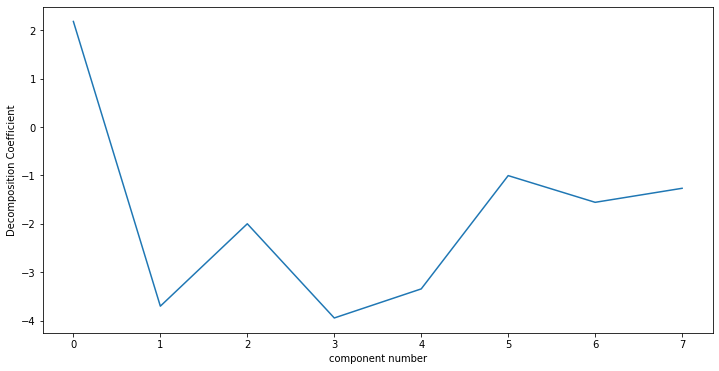

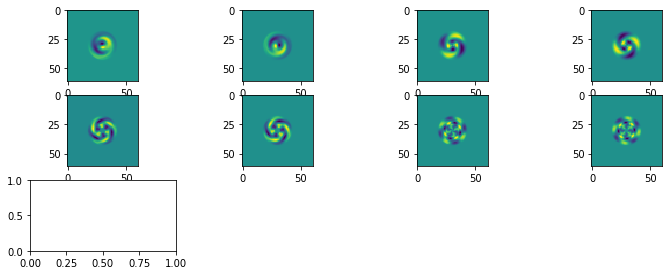

In [47]:
# Compute the PCA

pca = PCA(n_components=n_components)
pca.fit(im)

eigs = pca.singular_values_
rcParams['figure.figsize'] = (12., 6.0)
plt.figure
plt.subplot(121)
plt.plot(eigs)
plt.xlabel('component number')
plt.ylabel('Explained variance')
plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of components')
plt.ylabel('Total Explained variance percentage')

# display principal components

components = pca.components_
print(components.shape)

components_im = np.reshape(components,(n_components,m,n))
print(components_im.shape)

    
# display projections for one sample

coeffs = pca.transform(im)
print(coeffs.shape)

rand_sample = np.random.randint(nb_images)

plt.figure()
plt.plot(coeffs[rand_sample,:])
plt.xlabel('component number')
plt.ylabel('Decomposition Coefficient')



plt.figure()
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(components_im[i,:,:])

3) Visualize the reconstruction of a random sample using 3, 16 and 50 components. Comment on the quality of the reconstruction.

(100, 61, 61)


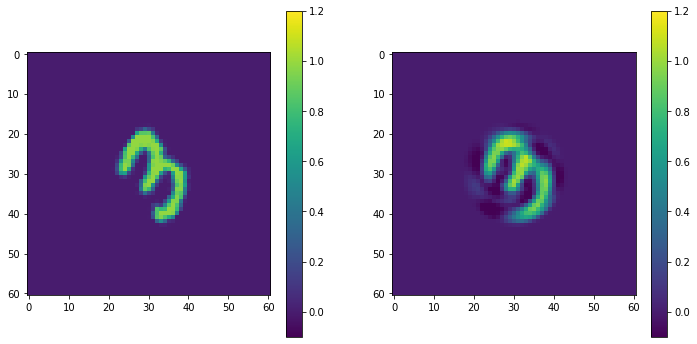

In [49]:
# Reconstruct samples

im_rec = np.reshape(pca.inverse_transform(coeffs),(100,m,n))
print(im_rec.shape)

plt.figure()
plt.subplot(121)
plt.imshow(images[:,:,rand_sample])
plt.clim([-0.1,1.2])
plt.colorbar()
plt.subplot(122)
plt.imshow(im_rec[rand_sample,:,:])
plt.clim([-0.1,1.2])
plt.colorbar()

plt.savefig("rec_3_8.png")

4) Visualize the data in 2 and 3D in two ways:
    i) By using projections on the canonical basis of $\mathbb{R}^{3721}$
    i) By using projections on the first three principal components
    
Compare and conclude on the intrinsic dimensionality of the data and the capacity of PCA to explain this dataset.


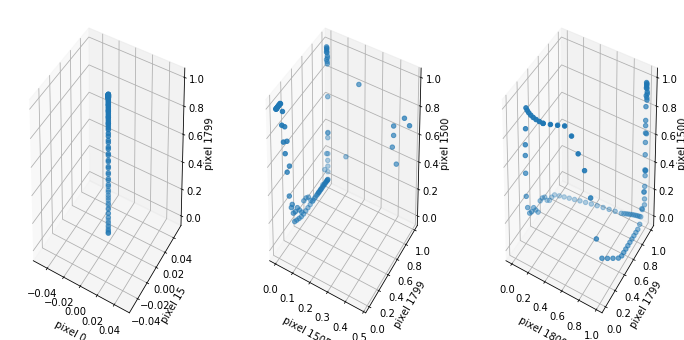

<Figure size 864x432 with 0 Axes>

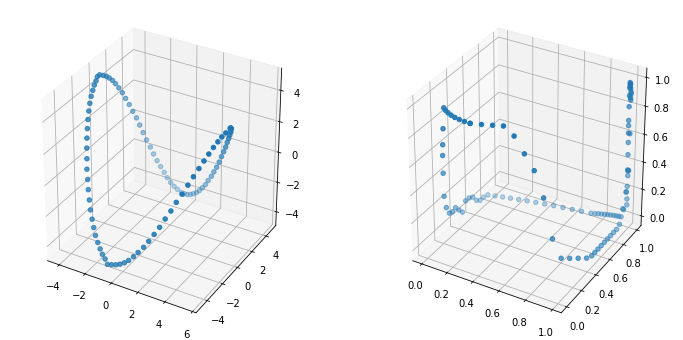

In [28]:
fig = plt.figure()
plt.figure()
ax = fig.add_subplot(131, projection='3d')
ax.scatter(im[:,0], im[:,15], im[:,1799])
ax.set_xlabel('pixel 0')
ax.set_ylabel('pixel 15')
ax.set_zlabel('pixel 1799')
ax = fig.add_subplot(132, projection='3d')
ax.scatter(im[:,1505], im[:,1799], im[:,1500])
ax.set_xlabel('pixel 1505')
ax.set_ylabel('pixel 1799')
ax.set_zlabel('pixel 1500')
ax = fig.add_subplot(133, projection='3d')
ax.scatter(im[:,1800], im[:,1799], im[:,1500])
ax.set_xlabel('pixel 1800')
ax.set_ylabel('pixel 1799')
ax.set_zlabel('pixel 1500')


fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(coeffs[:,0], coeffs[:,1], coeffs[:,2])
ax = fig.add_subplot(122, projection='3d')
ax.scatter(im[:,1800], im[:,1799], im[:,1500])